### マスキング

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# BGR->HSV
def BGR2HSV(_img):
    img = _img.copy()/255
    
    hsv = np.zeros_like(img, dtype=np.float32)
    
    # get max and nim
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()
    min_arg = np.argmin(img, axis=2)
    
    # H
    hsv[...,0][np.where(max_v==min_v)] = 0
    # if min == B
    ind = np.where(min_arg==0)
    hsv[...,0][ind] = 60*(img[...,1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
    # if min == R
    ind = np.where(min_arg==2)
    hsv[..., 0][ind] = 60*(img[...,0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
    # if min == G
    ind = np.where(min_arg==1)
    hsv[...,0][ind] = 60*(img[...,2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) +300
    
    # S
    hsv[..., 1] = max_v.copy() - min_v.copy()
    
    # V
    hsv[..., 2] = max_v.copy()
    
    return hsv

def get_mask(hsv):
    mask = np.zeros_like(hsv[...,0])
    mask[np.logical_and((hsv[..., 0]>180), (hsv[...,0]<260))] = 1
    return mask

def masking(img, mask):
    # これはブロードキャストできるのに
    mask = 1 - mask
    # 次は次元増やさずにやるとブロードキャストできないよってく
    mask = np.expand_dims(mask, -1)
    out = np.zeros_like(img, dtype=np.uint8)
    out = mask * img
    
    # これがないと何故か白黒画像になる
    out = out.astype(np.uint8)
    return out

(128, 128, 3)


True

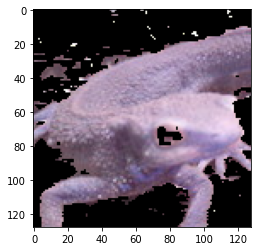

In [9]:
img = cv2.imread('../imori.jpg')
hsv = BGR2HSV(img)
mask = get_mask(hsv)
out = masking(img, mask)
print(out.shape)

plt.imshow(out)
cv2.imwrite('out71.jpg', out)
